/home/banyh2000/anaconda3/envs/odfn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/banyh2000/anaconda3/envs/odfn/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  6.38it/s]


(1, 4, 64, 64)


100%|██████████| 50/50 [00:05<00:00,  8.73it/s]


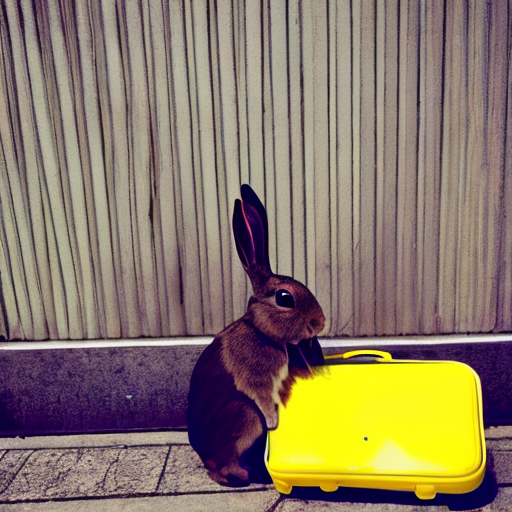

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '5'
from scripts.models.diffuserpipeline import StableDiffusionPipeline
import random
import numpy as np
import torch

def set_seed(seed: int) -> torch.Generator:
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    gen = torch.Generator(device='cuda')
    gen.manual_seed(seed)

prompt= "a rabbit and a yellow suitcase"
model_id = 'stabilityai/stable-diffusion-2-base'
device = 'cuda'
seed = 50

pipe = StableDiffusionPipeline.from_pretrained(model_id, use_auth_token=True).to(device)

with torch.no_grad():
    out = pipe(prompt=prompt, generator=set_seed(seed))
    out.images[0].show()
    
    

In [1]:
import os
import glob

def count_files_in_subdirectories(directory):
    subdirectories = [d for d in glob.glob(directory + '/*') if os.path.isdir(d)]
    file_counts = {}
    for subdir in subdirectories:
        files = glob.glob(subdir + '/*')
        file_counts[os.path.basename(subdir)] = len(files)
    return file_counts

directory = '/home/banyh2000/odfn/pics/re/animals'
file_counts = count_files_in_subdirectories(directory)
print(file_counts)

{'a elephant and a rabbit': 64, 'a dog and a frog': 64, 'a bird and a mouse': 64, 'a monkey and a frog': 64, 'a horse and a monkey': 64, 'a bird and a turtle': 64, 'a bird and a lion': 64, 'a lion and a monkey': 64, 'a horse and a turtle': 64, 'a bird and a monkey': 64, 'a bear and a frog': 64, 'a bear and a turtle': 64, 'a dog and a elephant': 37, 'a dog and a horse': 64, 'a turtle and a mouse': 64, 'a cat and a turtle': 64, 'a dog and a mouse': 64, 'a cat and a elephant': 64, 'a cat and a bird': 64, 'a dog and a monkey': 64, 'a lion and a mouse': 64, 'a bear and a lion': 64, 'a bird and a elephant': 64, 'a lion and a turtle': 64, 'a dog and a bird': 64, 'a bird and a rabbit': 64, 'a elephant and a turtle': 64, 'a lion and a elephant': 64, 'a cat and a rabbit': 64, 'a dog and a bear': 64, 'a dog and a rabbit': 64, 'a cat and a bear': 64, 'a bird and a horse': 64, 'a rabbit and a mouse': 64, 'a bird and a bear': 64, 'a bear and a monkey': 64, 'a horse and a frog': 64, 'a cat and a hors